## 1. Seasonal Decomposition

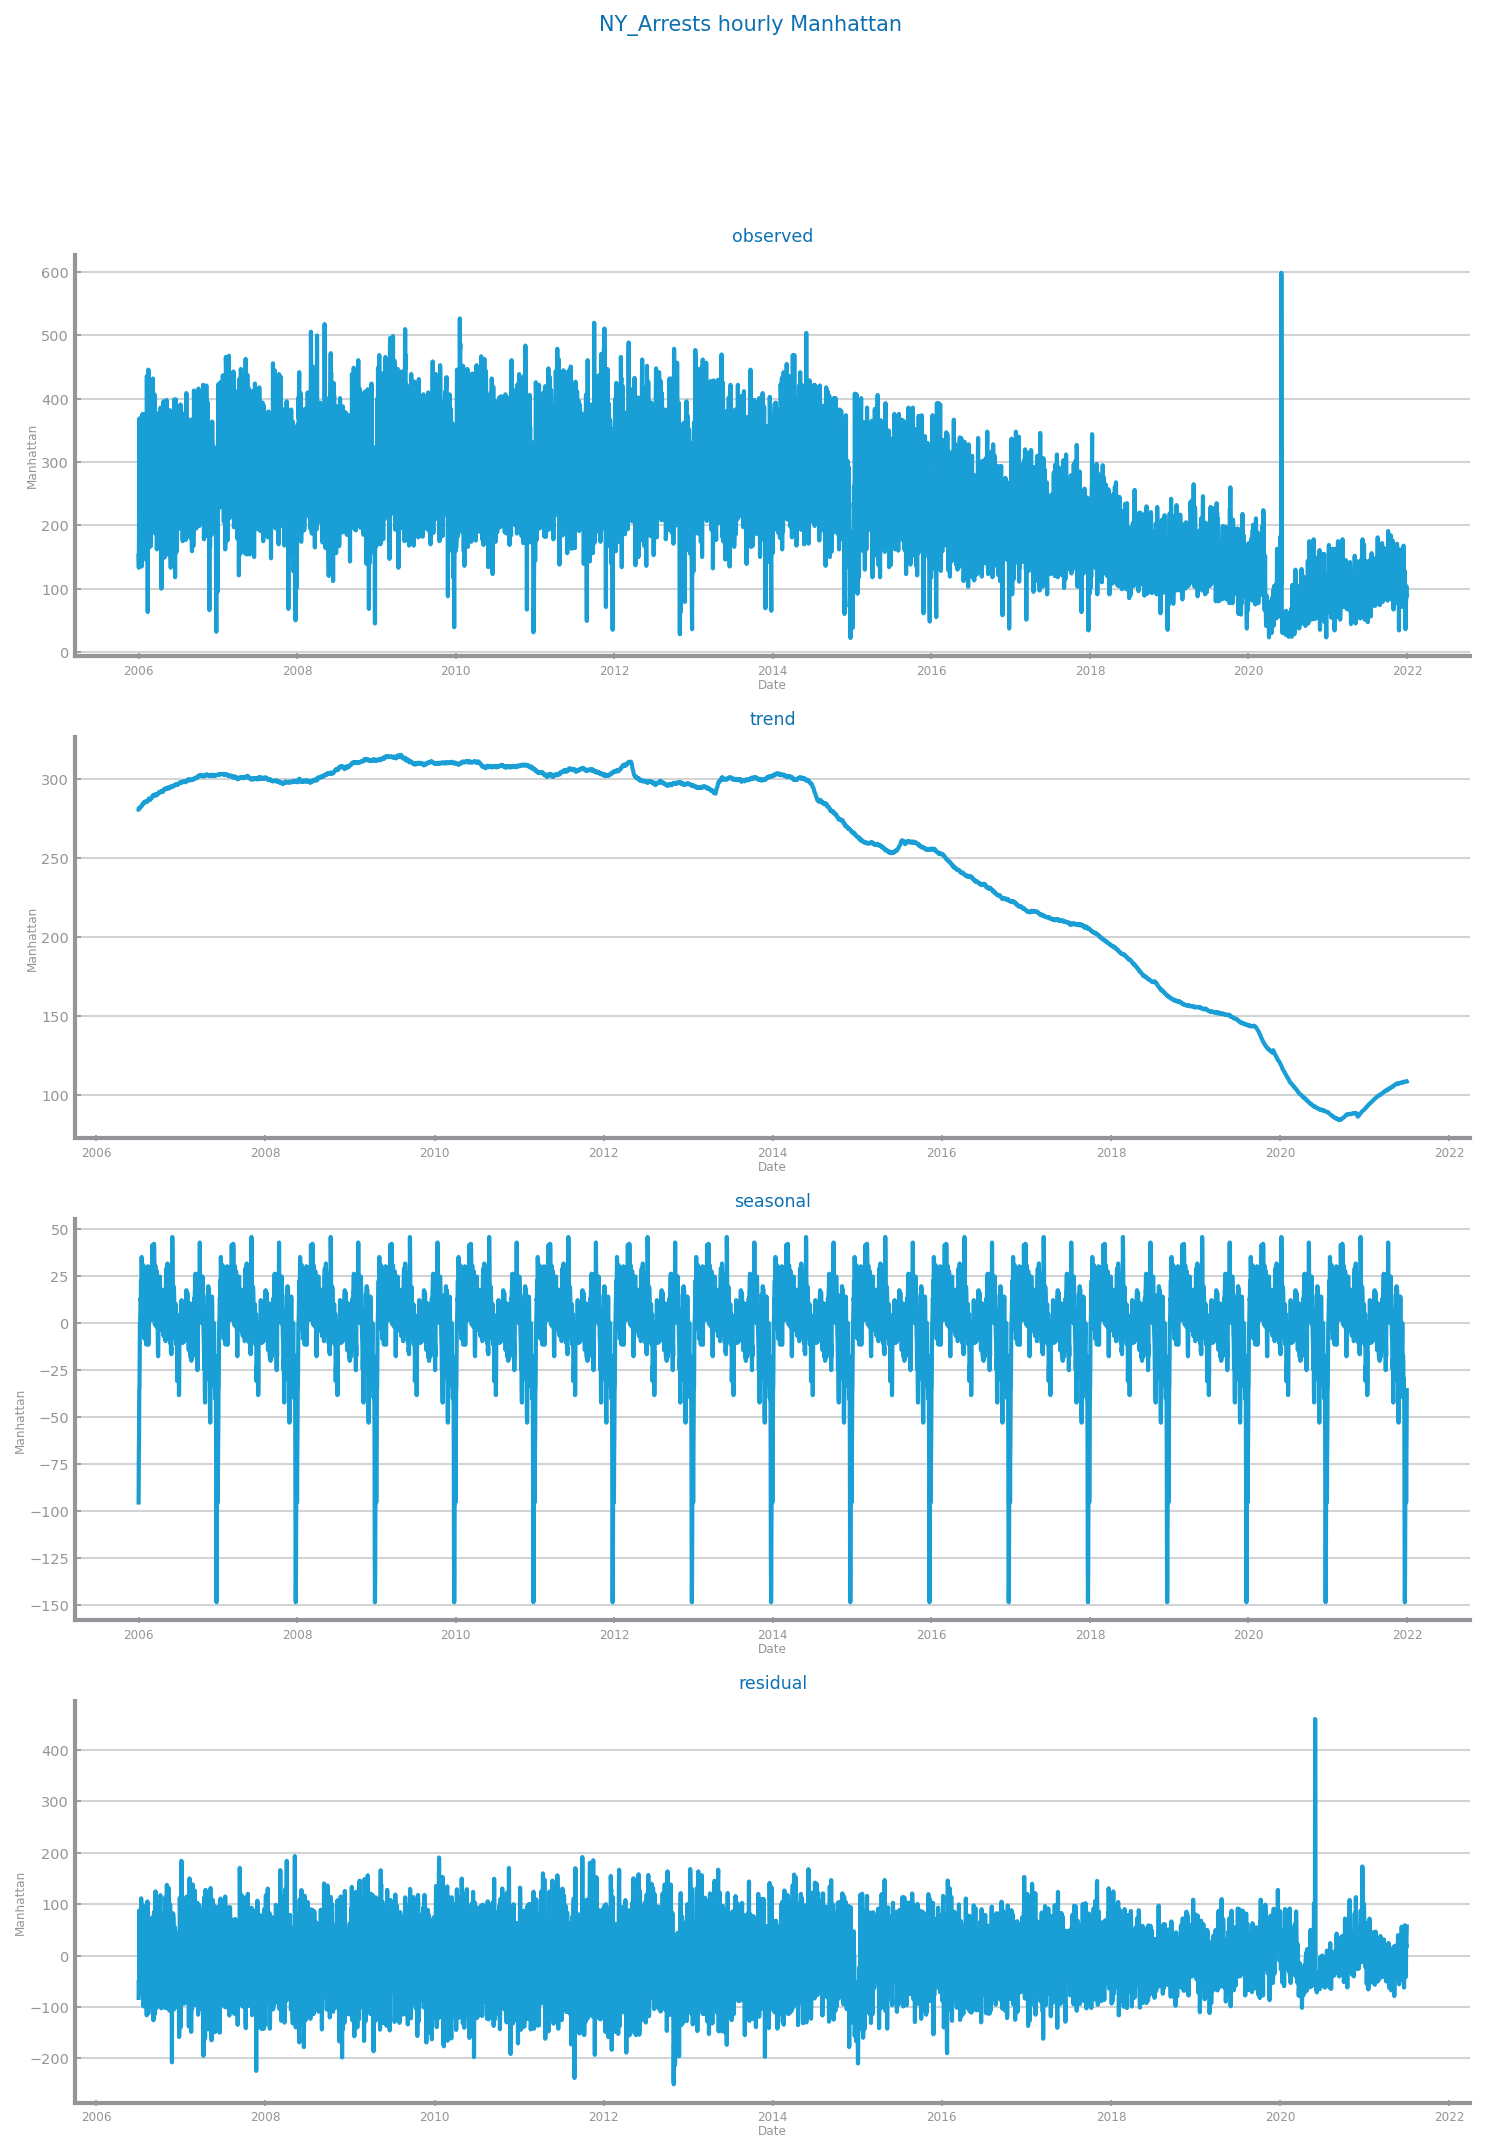

In [ ]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import subplots, show
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from statsmodels.tsa.seasonal import seasonal_decompose
from dslabs_functions import HEIGHT, set_chart_labels

# Define the function to plot seasonal decomposition components
def plot_components(
    series: Series,
    title: str = "",
    x_label: str = "time",
    y_label: str = "",
) -> list[Axes]:
    decomposition = seasonal_decompose(series, model="add", period=365)  # Adjust period if needed
    components = {
        "observed": series,
        "trend": decomposition.trend,
        "seasonal": decomposition.seasonal,
        "residual": decomposition.resid,
    }
    rows = len(components)
    fig, axs = subplots(rows, 1, figsize=(3 * HEIGHT, rows * HEIGHT))
    fig.suptitle(f"{title}")
    
    for i, (key, component) in enumerate(components.items()):
        set_chart_labels(axs[i], title=key, xlabel=x_label, ylabel=y_label)
        axs[i].plot(component)
    
    return axs

# File details
file_tag = "NY_Arrests"
filename = "/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/TimeSeries/forecast_ny_arrests.csv"
index = "Date"
target = "Manhattan"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=";",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Date column
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Extract the Manhattan series
series: Series = data[target]

# Apply seasonal decomposition and plot components
plot_components(
    series,
    title=f"{file_tag} daily {target}",
    x_label=series.index.name,
    y_label=target,
)
show()


## 2. Stationarity Study

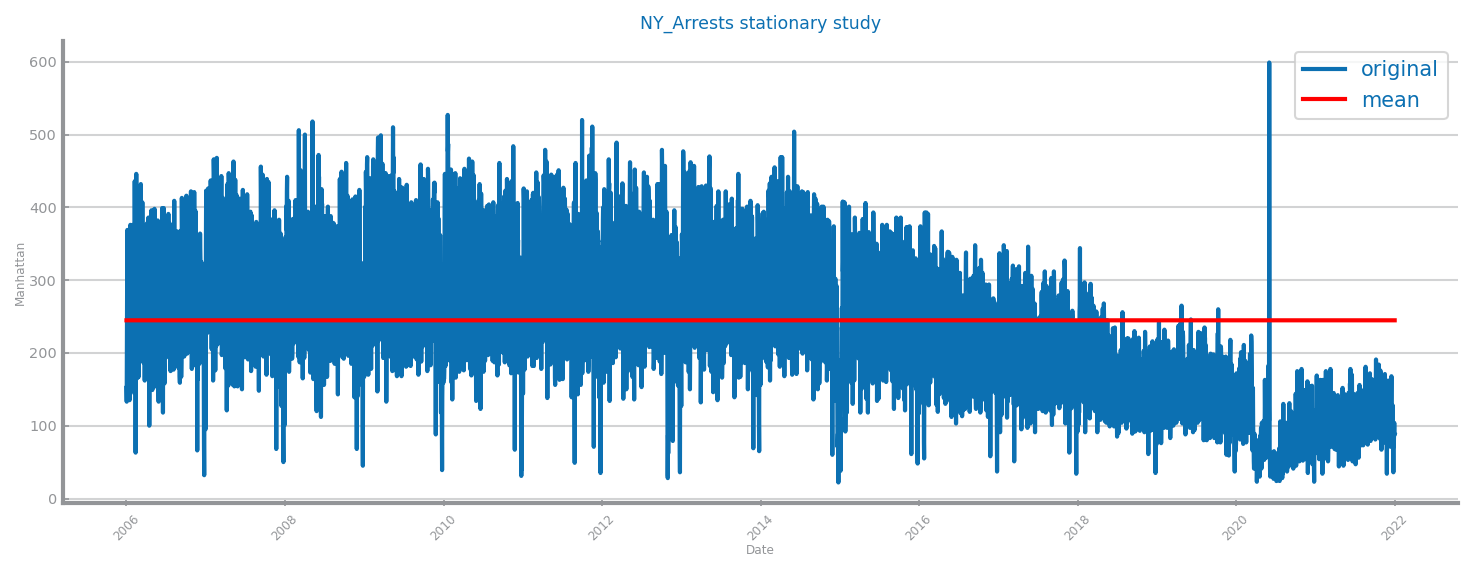

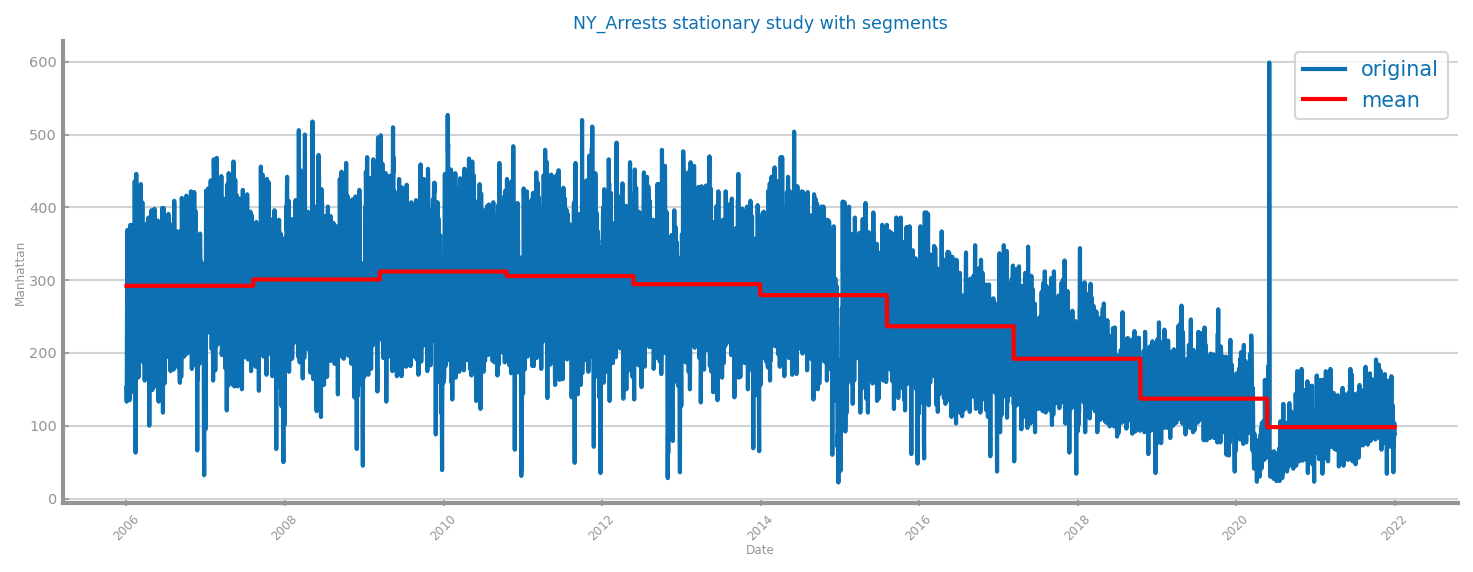

In [2]:
from matplotlib.pyplot import plot, legend, figure
from dslabs_functions import plot_line_chart

# Stationarity study: plot original series with mean and standard deviation
n: int = len(series)
mean_line = [series.mean()] * n

# Plot original series with global mean
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
)
plot(series.index, mean_line, "r-", label="mean")
legend()
show()

# Segment-wise mean study
BINS = 10
mean_line = []
for i in range(BINS):
    segment = series[i * n // BINS : (i + 1) * n // BINS]
    mean_value = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study with segments",
    name="original",
)
plot(series.index, mean_line, "r-", label="mean")
legend()
show()


## 3. Augmented Dickey-Fuller Test

In [3]:
from statsmodels.tsa.stattools import adfuller

# Define a function to evaluate stationarity
def eval_stationarity(series: Series) -> bool:
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05

# Evaluate and print stationarity results
is_stationary = eval_stationarity(series)
print(f"The series {('is' if is_stationary else 'is not')} stationary")


ADF Statistic: -1.887
p-value: 0.338
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series is not stationary
